In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generates the Clusters 
def generate_clusters(data, means):
    clusters = [[] for _ in range(means.shape[1])] #generating list of clusters 
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - means.T, axis=1) 
        cluster_index = np.argmin(distances) #cluster_index is the minimum distance cluster, assigned to the ith gene
        clusters[cluster_index].append(i) #ith gene added to the cluster with index cluster_index
    return clusters

# Updates the clusters and determines if convergence has or has not reached convergence
def update_clusters(data, clusters, means):
    converged = True #setting a converge variable to check whether the means change after updating
    for i in range(len(clusters)):
        cluster = clusters[i]
        if len(cluster) == 0: #checking if the cluster is empty
            continue
        new_mean = np.mean(data[cluster], axis=0) #new centroid is the means of data points of old cluster
        if not np.array_equal(new_mean, means[:, i]): #if means change, the algorithm has not converged
            converged = False
        means[:, i] = new_mean
    return converged, means

def k_means(data,means, k, max_iterations):
    iterations = 0
    obj_values = []
    while iterations < max_iterations: #continue clustering until max iterations reached
        clusters = generate_clusters(data, means)
        obj_value = 0 
        for i in range(len(clusters)): #ranging over the clusters
            cluster = clusters[i]
            for j in range(len(cluster)): #ranging over the number of elements in ith cluster
                data_point = data[cluster[j]] #retrieving the (cluster[j])th element in data
                distance = np.square(euclidean_distance(data_point, means[:, i])) #calculating distance of gene from centroid
                obj_value += distance  
        obj_values.append(obj_value)
        converged, means = update_clusters(data, clusters, means) 
        if len(clusters[0]) == data.shape[0] or converged: #if algorithm has converged or all elements in one cluster
            break
        iterations += 1
    return clusters, means, obj_values

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


def random_clusters(data,k):
    means_random = np.random.randint(1,data.shape[0]+1,size=k)
    means_array=np.zeros((data.shape[1],k))
    for i in range(len(means_random)):
        means_array[:,i]=data[means_random[i],:]
    clusters, means, obj_values = k_means(data, means_array, k, 50)
    return clusters, means, obj_values

def heatmap(clusters,data,index,minimum):
    
    grouped_data = []
    for i in range(len(clusters)):
        cluster_data = np.zeros((data.shape[1], len(clusters[i])))
        for j in range(len(clusters[i])):
            cluster_data[:, j] = data.T[:, clusters[i][j]]
        grouped_data.append(cluster_data)

    grouped_data = np.concatenate(grouped_data, axis=1)

        
    grouped = np.corrcoef(grouped_data.T)
    title="CC Matrix of Grouped Data K="+str(index)+", Objective Function:"+str(minimum)
    plt.imshow(grouped)
    plt.colorbar()
    plt.title(title, fontsize=5)
    plt.show

In [26]:
#load and process data here
data_pd = pd.read_csv("filtered_data_BAL.csv").iloc[:,1:]
data = data_pd.to_numpy()
data.shape

(780, 154)

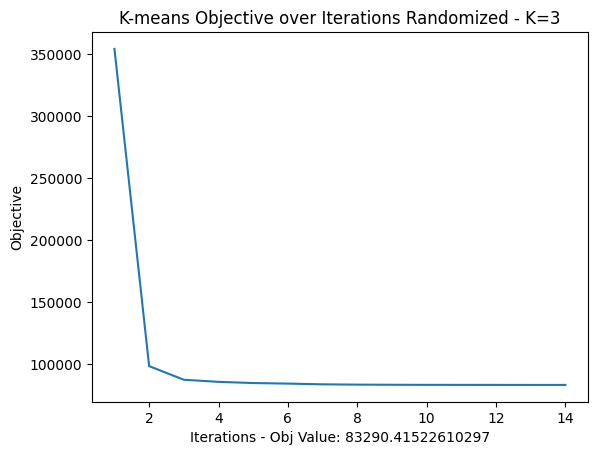

In [31]:
clusters,means,obj_values=random_clusters(data,3)
min_obj=obj_values[-1]
plt.plot(range(1, len(obj_values)+1), obj_values)
plt.title('K-means Objective over Iterations Randomized - K=3')
plt.xlabel('Iterations - Obj Value: {x}'.format(x=min_obj))
plt.ylabel('Objective')
plt.savefig("k-means3.png")
plt.show()

In [32]:
print(means.shape)

(154, 3)


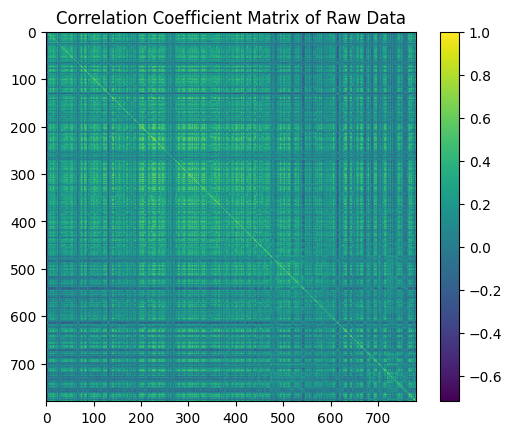

In [33]:
raw = np.corrcoef(data)
plt.imshow(raw)
plt.colorbar()
plt.title('Correlation Coefficient Matrix of Raw Data')
plt.savefig("CCMatrix.png")
plt.show()

In [30]:
# for i in range(3,8):
#     cluster_obj=dict()
#     for j in range(5):
#         clusters,means,obj_values=random_clusters(data,i)
#         cluster_obj[obj_values[-1]]=clusters
    
#     new_cluster=cluster_obj[min(cluster_obj.keys())]
    
#     plt.subplot(5,2,i-2)
#     heatmap(new_cluster,data,i,min(cluster_obj.keys()))
